In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataSet/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
gender                         1000 non-null object
race/ethnicity                 1000 non-null object
parental level of education    774 non-null object
lunch                          1000 non-null object
test preparation course        1000 non-null object
mathscore                      1000 non-null int64
reading score                  1000 non-null int64
writing score                  1000 non-null int64
dtypes: int64(3), object(5)
memory usage: 43.0+ KB


In [3]:
df.describe()

,mathscore,reading score,writing score
count,1000.000000,1000.000000,1000.000000
mean,65.969000,69.169000,68.054000
std,15.310338,14.600192,15.195657
min,0.000000,17.000000,10.000000
25%,56.750000,59.000000,57.750000
50%,66.000000,70.000000,69.000000
75%,77.000000,79.000000,79.000000
max,100.000000,100.000000,100.000000


In [4]:
df.head(7)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,NaN,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,NaN,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,NaN,standard,completed,88,95,92


In [5]:
df2 = df.drop(['lunch','test preparation course'],axis=1,inplace = False)
df2.head(7)

,gender,race/ethnicity,parental level of education,mathscore,reading score,writing score
0,female,group B,bachelor's degree,72,72,74
1,female,group C,NaN,69,90,88
2,female,group B,master's degree,90,95,93
3,male,group A,associate's degree,47,57,44
4,male,group C,NaN,76,78,75
5,female,group B,associate's degree,71,83,78
6,female,group B,NaN,88,95,92


In [6]:
df['parental level of education'] = df['parental level of education'].fillna('default')
df.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,default,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,default,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,default,standard,completed,88,95,92
7,male,group B,default,free/reduced,none,40,43,39


In [7]:
df['race/ethnicity'] = df['race/ethnicity'].map({
    'group A' : 'Asian',
    'group B' : 'African',
    'group C' : 'Afro-Asian',
    'group D' :'American'
})
df.head(8)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score
0,female,African,bachelor's degree,standard,none,72,72,74
1,female,Afro-Asian,default,standard,completed,69,90,88
2,female,African,master's degree,standard,none,90,95,93
3,male,Asian,associate's degree,free/reduced,none,47,57,44
4,male,Afro-Asian,default,standard,none,76,78,75
5,female,African,associate's degree,standard,none,71,83,78
6,female,African,default,standard,completed,88,95,92
7,male,African,default,free/reduced,none,40,43,39


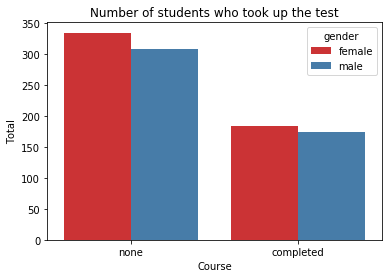

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.countplot(x='test preparation course', hue='gender', palette='Set1', data=df)
ax.set(title = 'Number of students who took up the test',
       xlabel = 'Course', ylabel = 'Total')
plt.show()

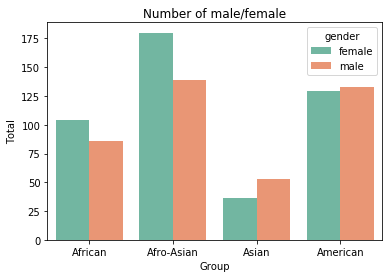

In [11]:
ax = sns.countplot(x='race/ethnicity', hue='gender', palette='Set2', data = df)
ax.set(title = 'Number of male/female',
       xlabel = 'Group', ylabel = 'Total')
plt.show()

In [13]:
interval = (0,40,60,75,110)
category = ['Fail','2nd Class','Ist Class','Distinction']
df['marks_cat'] = pd.cut(df.mathscore, interval, labels=category)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score,marks_cat
0,female,African,bachelor's degree,standard,none,72,72,74,Ist Class
1,female,Afro-Asian,default,standard,completed,69,90,88,Ist Class
2,female,African,master's degree,standard,none,90,95,93,Distinction
3,male,Asian,associate's degree,free/reduced,none,47,57,44,2nd Class
4,male,Afro-Asian,default,standard,none,76,78,75,Distinction


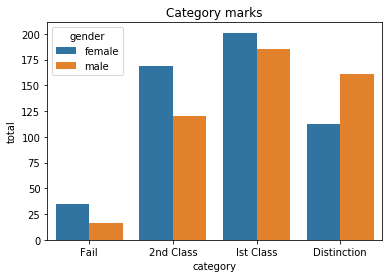

In [16]:
ax = sns.countplot(data = df, x ='marks_cat', hue='gender')
ax.set(title='Category marks', xlabel = 'category', ylabel='total')
plt.show()

In [17]:
df['marks_cat'] = pd.cut(df['reading score'], interval, labels=category)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score,marks_cat
0,female,African,bachelor's degree,standard,none,72,72,74,Ist Class
1,female,Afro-Asian,default,standard,completed,69,90,88,Distinction
2,female,African,master's degree,standard,none,90,95,93,Distinction
3,male,Asian,associate's degree,free/reduced,none,47,57,44,2nd Class
4,male,Afro-Asian,default,standard,none,76,78,75,Distinction


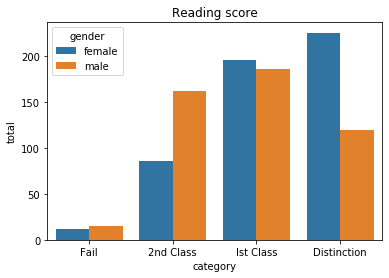

In [19]:
ax = sns.countplot(data = df, x ='marks_cat', hue='gender')
ax.set(title='Reading score', xlabel = 'category', ylabel='total')
plt.show()

In [20]:
df['marks_cat'] = pd.cut(df['writing score'], interval, labels=category)
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,mathscore,reading score,writing score,marks_cat
0,female,African,bachelor's degree,standard,none,72,72,74,Ist Class
1,female,Afro-Asian,default,standard,completed,69,90,88,Distinction
2,female,African,master's degree,standard,none,90,95,93,Distinction
3,male,Asian,associate's degree,free/reduced,none,47,57,44,2nd Class
4,male,Afro-Asian,default,standard,none,76,78,75,Ist Class


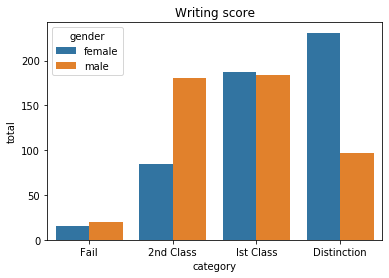

In [21]:
ax = sns.countplot(data = df, x ='marks_cat', hue='gender')
ax.set(title='Writing score', xlabel = 'category', ylabel='total')
plt.show()

In [22]:
df.groupby('race/ethnicity').mean()

,mathscore,reading score,writing score
race/ethnicity,,,
African,63.452632,67.352632,65.600000
Afro-Asian,64.282132,69.103448,67.827586
American,67.362595,70.030534,70.145038
Asian,61.629213,64.674157,62.674157
